In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from scipy.stats import gamma
from scipy.stats import poisson

### Simulate data 

sampled n=14,lambda1=0.95640,lambda2=0.22896


(array([11.,  0.,  5.,  0.,  0.,  1.,  0.,  2.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

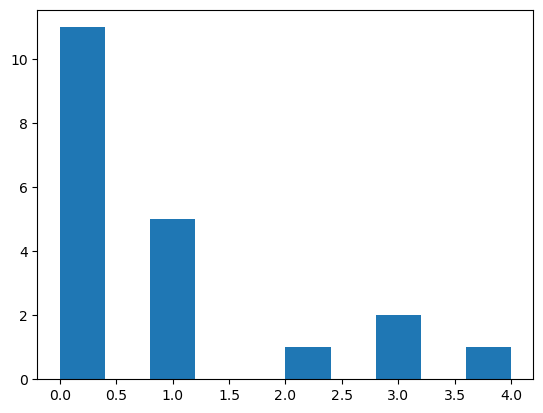

In [66]:
N=20
a=1.2
b=1.2

lambda1 = np.random.gamma(a,b)
lambda2 = np.random.gamma(a,b)
n = np.random.choice(N)

print (f"sampled n={n},lambda1={lambda1:.5f},lambda2={lambda2:.5f}")
xi= np.array([np.random.poisson(lambda1) if i<=n else np.random.poisson(lambda2)\
             for i in range(N)])
plt.hist(xi)

### MCMC

In [67]:
def MHalgo(T,func_posterior,fx_proposal,start):
    chain = np.zeros(T)
    acceptance_arr = np.zeros(T)
    chain[0]=start
    for t in range(1,T):
        theta_old = chain[t-1]
        #propose new point
        theta_proposal = fx_proposal(theta_old)
        #get acceptance ratio
        posterior_proposal = func_posterior(theta_proposal)
        posterior_old = func_posterior(theta_old)
        A = (posterior_proposal)/(posterior_old) #for symmteric proposal
        #accept or reject
        u = np.random.uniform()
        if u<=min(1,A):
            chain[t]=theta_proposal
            acceptance_arr[t] = 1
        else:
            chain[t] = theta_old
    print (f"AR:{np.mean(acceptance_arr):.4f}")
    return chain,np.mean(acceptance_arr)

def proposal(old,sigma=0.6):
    return np.random.normal(loc=old,scale=sigma)

/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_54313/2777530259.py:12: RuntimeWarning: invalid value encountered in double_scalars
  A = (posterior_proposal)/(posterior_old) #for symmteric proposal
/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_54313/2777530259.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  A = (posterior_proposal)/(posterior_old) #for symmteric proposal


AR:0.9488


Text(0.5, 1.0, 'Posterior density for $\\lambda_1$')

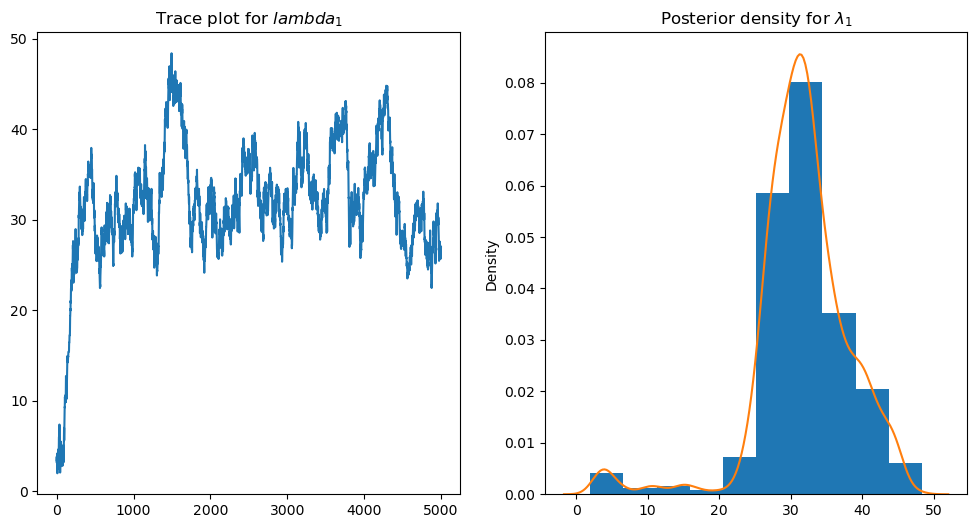

In [68]:
#posterior for lambda1
def posterior_lambda1(x,xi,n):
    return gamma(a+xi[:n].sum(),b+n).pdf(x)

mh_chain,AR = MHalgo(5200,lambda x: posterior_lambda1(x,xi=xi,n=n),proposal,1)
mh_chain_clean = mh_chain[200:]
fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
plt.plot(mh_chain_clean)
plt.title("Trace plot for $lambda_1$")
plt.subplot(122)
plt.hist(mh_chain_clean,density=True)
sns.kdeplot(mh_chain_clean)
plt.title("Posterior density for $\\lambda_1$")

/var/folders/kb/v0p0ypbd0wx1q2qb1kpxmmcc0000gn/T/ipykernel_54313/2777530259.py:12: RuntimeWarning: invalid value encountered in double_scalars
  A = (posterior_proposal)/(posterior_old) #for symmteric proposal


AR:0.9998


Text(0.5, 1.0, 'Posterior density for $\\lambda_2$')

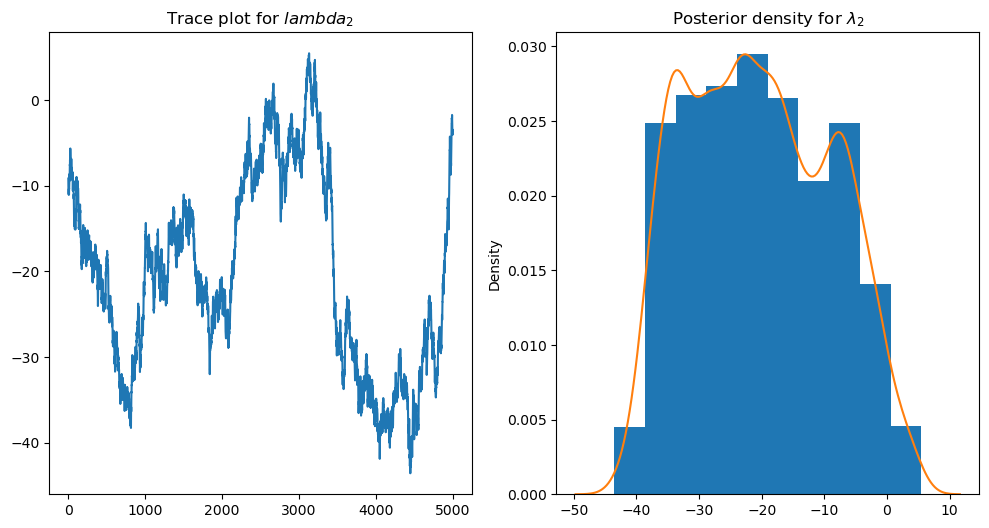

In [69]:
#posterior for lambda2
def posterior_lambda2(x,xi,n):
    return gamma(a+xi[n:].sum(),b+len(xi)-n).pdf(x)

mh_chain,AR = MHalgo(5200,lambda x: posterior_lambda2(x,xi=xi,n=n),proposal,1)
mh_chain_clean = mh_chain[200:]
fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
plt.plot(mh_chain_clean)
plt.title("Trace plot for $lambda_2$")
plt.subplot(122)
plt.hist(mh_chain_clean,density=True)
sns.kdeplot(mh_chain_clean)
plt.title("Posterior density for $\\lambda_2$")

AR:0.3590


Text(0.5, 1.0, 'Posterior density for $n$')

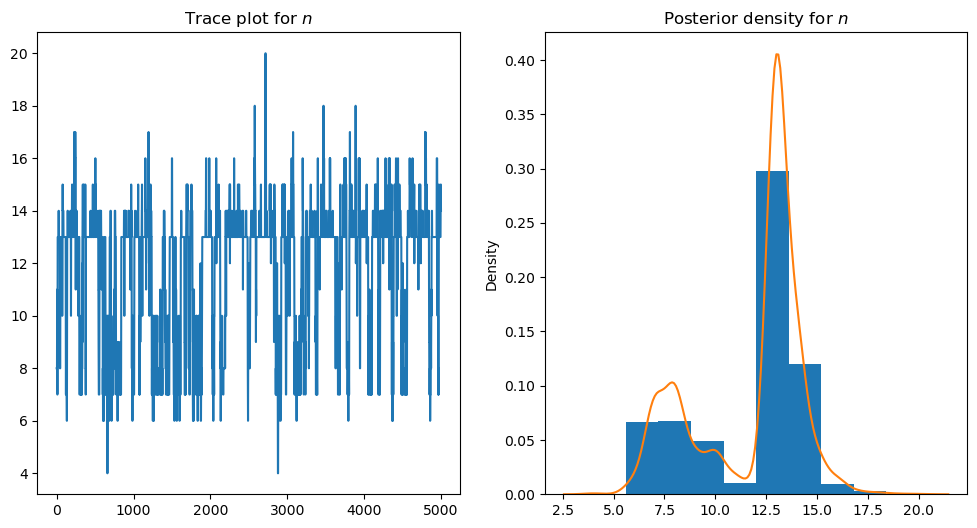

In [84]:
#posterior for n
def posterior_n(x,lambda1,lambda2,xi):
    return np.exp(-x*lambda1-x*lambda2)*np.power(lambda1,xi[:int(x)].sum())*np.power(lambda2,xi[int(x):].sum())

def proposal2(old,sigma=3):
    return np.random.choice(np.array([x for x in range(int(old-sigma),int(old+sigma+1))]))

mh_chain,AR = MHalgo(5200,lambda x: posterior_n(x,lambda1,lambda2,xi),proposal2,15)
mh_chain_clean = mh_chain[200:]
fig,ax = plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
plt.plot(mh_chain_clean)
plt.title("Trace plot for $n$")
plt.subplot(122)
plt.hist(mh_chain_clean,density=True)
sns.kdeplot(mh_chain_clean)
plt.title("Posterior density for $n$")